<a href="https://colab.research.google.com/github/Shan-Niit/story/blob/main/support_vector_regression_auto_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [64]:
dataset = pd.read_csv('/content/SVR_multiple_features.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values.reshape(-1, 1)

## Feature Scaling

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standard Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)
y_train_scaled = sc_y.fit_transform(y_train).ravel()


## Training the SVR model

In [66]:
from sklearn.svm import SVR
regressor = SVR(kernel= "rbf")
regressor.fit(X_train_scaled, y_train_scaled)

SVR()

## Predicting a new result

In [67]:
y_pred_scaled = regressor.predict(X_test_scaled)  # Predict on scaled X_test
y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1,1))  # Inverse transform y


## Visualising the SVR results

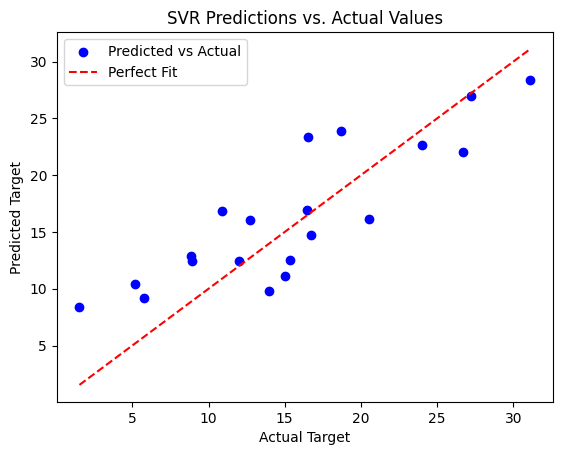

In [71]:
#Show the predictions with the actual values (y_test)
plt.scatter(y_test, y_pred, color='blue', label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed', label="Perfect Fit")
plt.xlabel("Actual Target")
plt.ylabel("Predicted Target")
plt.title("SVR Predictions vs. Actual Values")
plt.legend()
plt.show()

## Score the model

In [68]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}")


R2 Score: 0.7116174643535584
Mean Squared Error: 16.52269823506835
Mean Absolute Error: 3.583154366784617
Root Mean Squared Error: 4.0648122016974355


# The model doesn't fit correctly (71%), other models should be try !